# Model fitting 4: Only Synchrotron

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
import jetset
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
test_SEDs

['/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_3C345.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv',
 '/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk501_EBL_DEABS.ecsv']

## Loading data



In [3]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[1])


/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv



***  binning data  ***
---> N bins= 89
---> bin_widht= 0.2



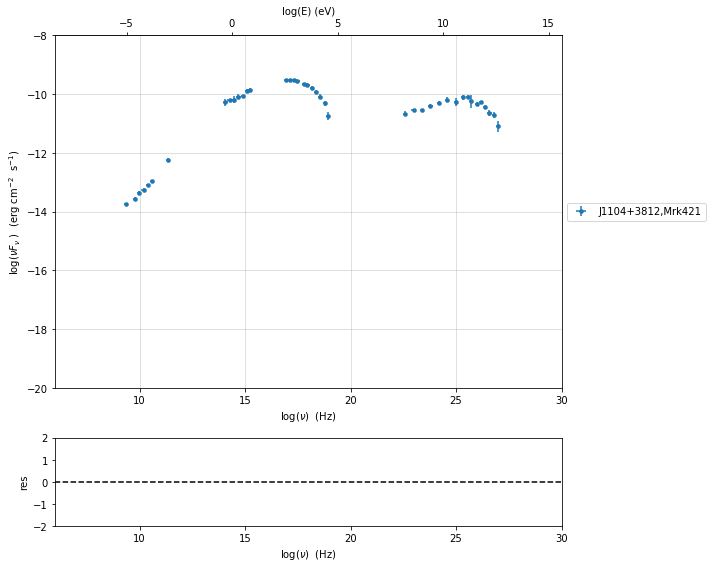

In [4]:
%matplotlib inline
sed_data=ObsData(data_table=data)
sed_data.group_data(bin_width=0.2)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed()

In [5]:
sed_data.save('Mrk_401.pkl')

## Phenomenological model constraining

### Spectral indices


*** evaluating spectral indices for data ***



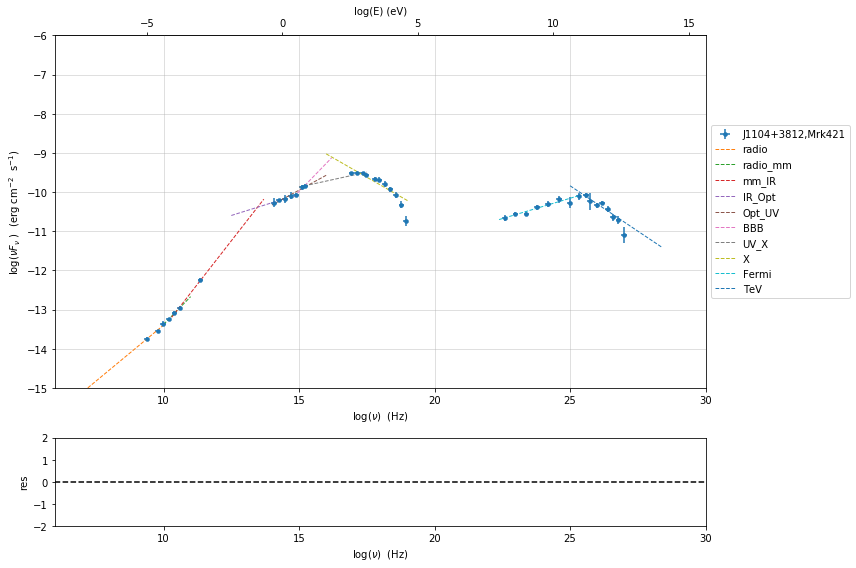

In [6]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

### Sed shaper

In [7]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=False,
                  Ep_start=None,
                  minimizer='lsb',
                  silent=True,
                  fit_range=[10., 21.])


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10.0, 21.0]
---> class:  HSP



model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -1.545301e-01 9.534756e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -1.023245e-02 1.433074e-03    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  1.672267e+01 4.139904e-02    --  1.667039e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -9.491658e+00 2.515289e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> sync       nu_p=+1.672267e+01 (err=+4.139904e-02)  nuFnu_p=-9.491658e+00 (err=+2.515289e-02) curv.=-1.545301e-01 (err=+9.534756e-03)




*** Log-Polynomial fitting of the IC component ***
---> fit range: [23.0, 29.0]
---> LogCubic fit


model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -2.097925e-01 3.133727e-02    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -4.662648e-02 2.178444e-02    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  2.524932e+01 1.147866e-01    --  2.529412e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -1.011094e+01 3.498801e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> IC         nu_p=+2.524932e+01 (err=+1.147866e-01)  nuFnu_p=-1.011094e+01 (err=+3.498801e-02) curv.=-2.097925e-01 (err=+3.133727e-02)



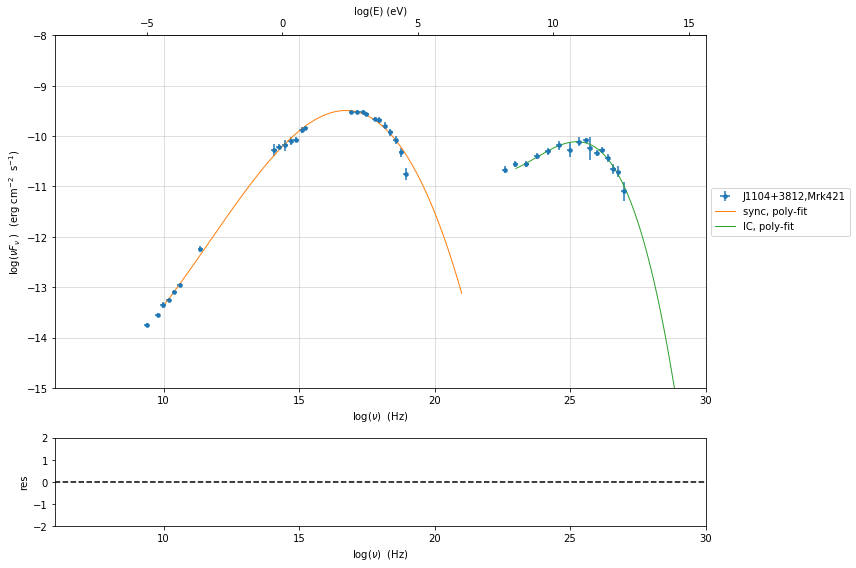

In [8]:
my_shape.IC_fit(fit_range=[23., 29.],minimizer='minuit',silent=True)
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15)

### Model constraining

In [9]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.001,0.1],
                        distr_e='lppl',
                        t_var_sec=3*86400,
                        nu_cut_IR=1E12,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False,silent=True)
prefit_jet.save_model('prefit_jet.pkl')


***  constrains parameters from observable ***

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 3.338231e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 3.072164e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.181578e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 7.726503e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 2.265855e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size           

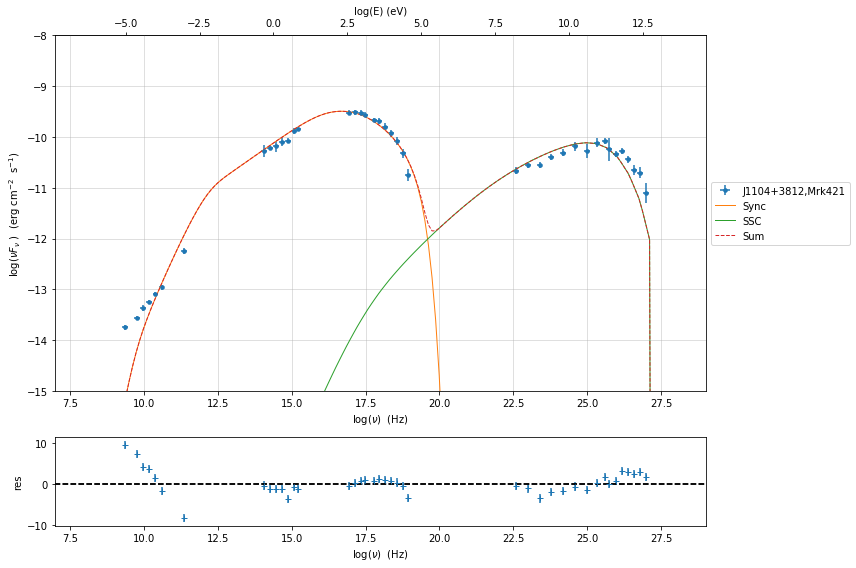

In [10]:
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

## Model fitting only Synchorotron component

### Model fitting with Minuit

In [11]:
from jetset.jet_model import Jet
jet_minuit=Jet.load_model('prefit_jet.pkl')
jet_minuit.set_gamma_grid_size(200)

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 3.338231e+02     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 3.072164e+00     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.181578e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 7.726503e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 2.265855e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 1.649188e+16     1.000000e+03     1.000000e

we switch off the IC component

In [12]:

jet_minuit.spectral_components.SSC.state='off'
jet_minuit.show_model()


-------------------------------------------------------------------------------------------------------------------
jet model description
-------------------------------------------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 3.338231e+02
 gmax grid : 9.758134e+05
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  50
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: off
external fields transformation method: blob

SED info:
 nu grid size :200
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-120

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- --

In [13]:
fit_model_minuit=FitModel( jet=jet_minuit, name='Only-Synch-best-fit-minuit') 

fit_model_minuit.freeze('jet_leptonic','z_cosm')
fit_model_minuit.freeze('jet_leptonic','R_H')
fit_model_minuit.freeze('jet_leptonic','R')
fit_model_minuit.freeze('jet_leptonic','gmax')
fit_model_minuit.jet_leptonic.parameters.R.fit_range=[10**15.5, 10**17.5]
fit_model_minuit.jet_leptonic.parameters.beam_obj.fit_range=[5., 50.]

In [14]:
from jetset.minimizer import fit_SED,ModelMinimizer

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,10.0**15,10**20.0,fitname='SSC-best-fit-minuit')

filtering data in fit range = [1.000000e+15,1.000000e+20]
data length 13

*** start fit process ***
----- 
/ minim function calls=180, chisq=10.025227 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-minuit
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 3.316412e+02     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 9.758134e+05     1.000000e+00     1.000000e+15 False   True
jet_leptonic                N    emitters_density         1 / cm3 3.056138e+00     0.000000e+00               -- False  False
jet_leptonic                s   LE_spectral_slope              

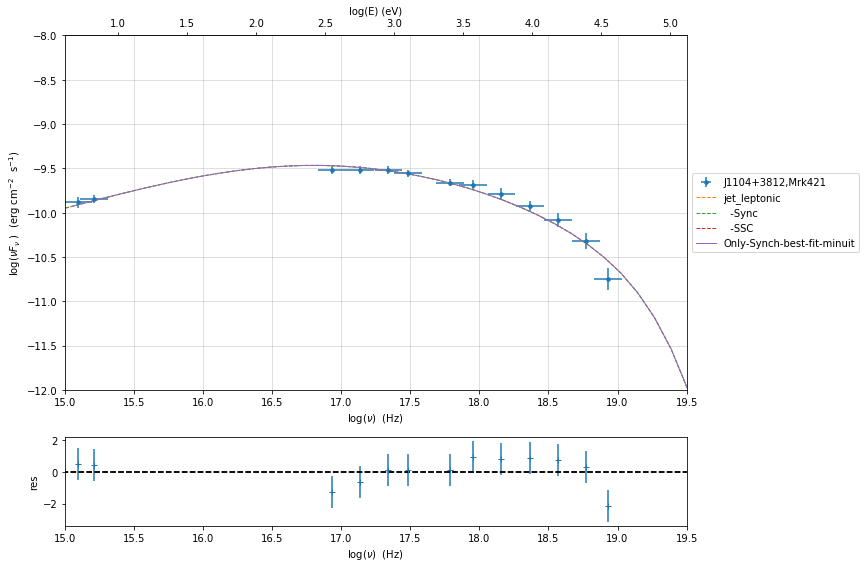

In [15]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-12,x_min=15,x_max=19.5)

In [16]:
model_minimizer_minuit.minimizer.mesg

------------------------------------------------------------------
| FCN = 9.883                   |     Ncalls=173 (184 total)     |
| EDM = 2.57E+04 (Goal: 1E-05)  |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | par_0 |   331.6   |    1.2    |            |            |    1    |  1e+09  |       |
| 1 | par_1 |    3.1    |    1.1    |            |            |    0    |         |       |
| 2 | par_2 |   2.12    |   0.06    |            |            |   -10   |   10    |       |
| 3 | par_3 |   0.97    |   0.09    |            |            |   -15   |   15    |       |
| 4 | par_4 |  0.34E5   |  0.06E5   |            |            |    1    |  1e+09  |       |
| 5 | par_5 |   0.087   |   0.014   |            |            |    0    |         |       |
| 6 | par_6 |   24.0    |    2.0    |            |            |    5    |   50    |       |
-------------------------------------------------------------------------------------------

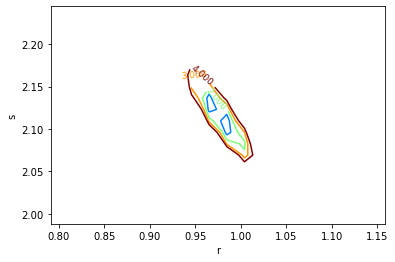

In [17]:
c=model_minimizer_minuit.minimizer.draw_contour('r','s')

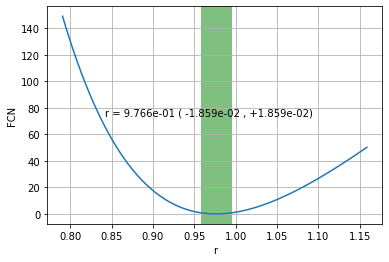

In [18]:
m=model_minimizer_minuit.minimizer.draw_profile('r')

In [19]:
best_fit_minuit.save_report('SSC-best-fit-minuit.txt')
model_minimizer_minuit.save_model('model_minimizer_minuit.pkl')
fit_model_minuit.save_model('fit_model_minuit.pkl')

## MCMC sampling

In [20]:
from jetset.mcmc import McmcSampler
from jetset.minimizer import ModelMinimizer


In [21]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_minuit.pkl')

mcmc=McmcSampler(model_minimizer_minuit)

labels=['N','B','beam_obj','s','gamma0_log_parab']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=50,bound=5.0,bound_rel=True,threads=None,walker_start_bound=0.005,use_labels_dict=use_labels_dict)

mcmc run starting


100%|██████████| 50/50 [04:28<00:00,  5.37s/it]

mcmc run done, with 1 threads took 274.22 seconds


In [22]:
print(mcmc.acceptance_fraction)

0.5090625


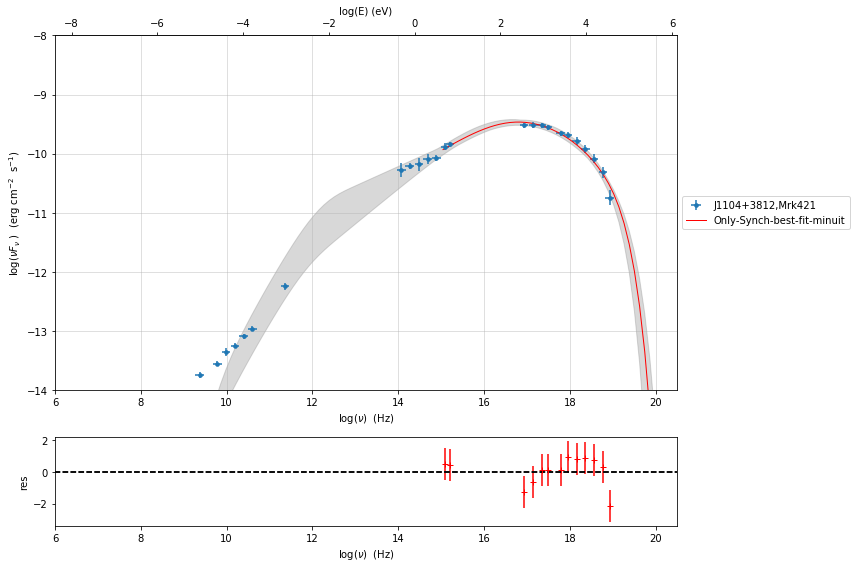

In [23]:
p=mcmc.plot_model(sed_data=sed_data,fit_range=[15., 20.],size=50)
p.rescale(y_min=-14,x_min=6,x_max=20.5)

f=mcmc.plot_chain('s',log_plot=False)

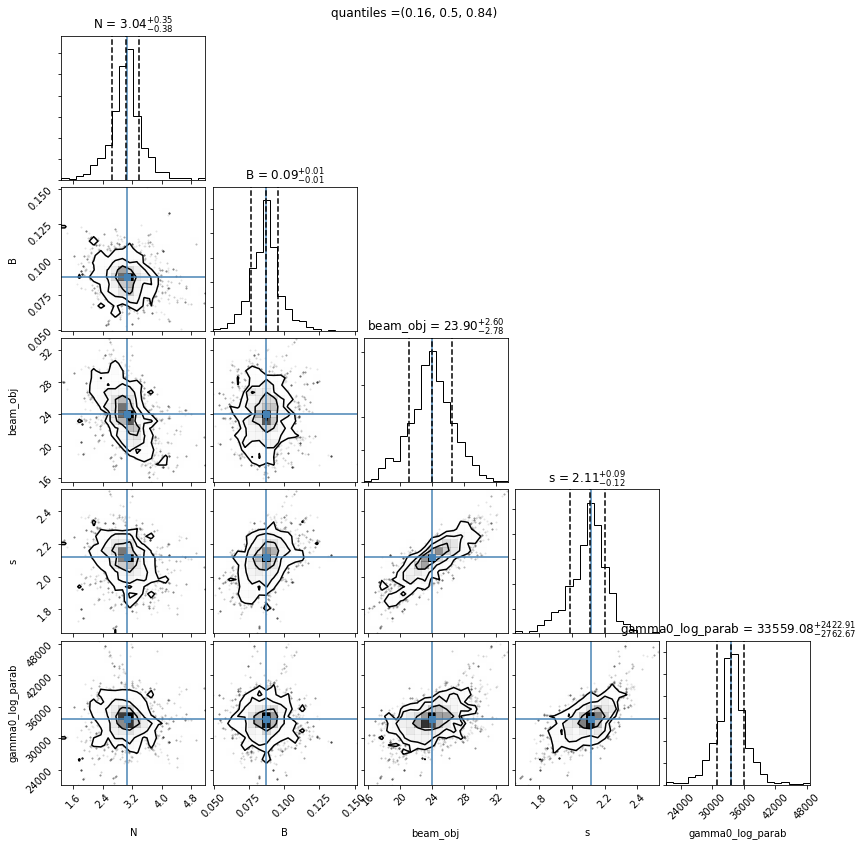

In [24]:
f=mcmc.corner_plot()

In [25]:
mcmc.get_par('N')

(array([3.12933366, 3.01311456, 3.02939386, ..., 2.62278947, 3.83006784,
        3.75335437]),
 0)

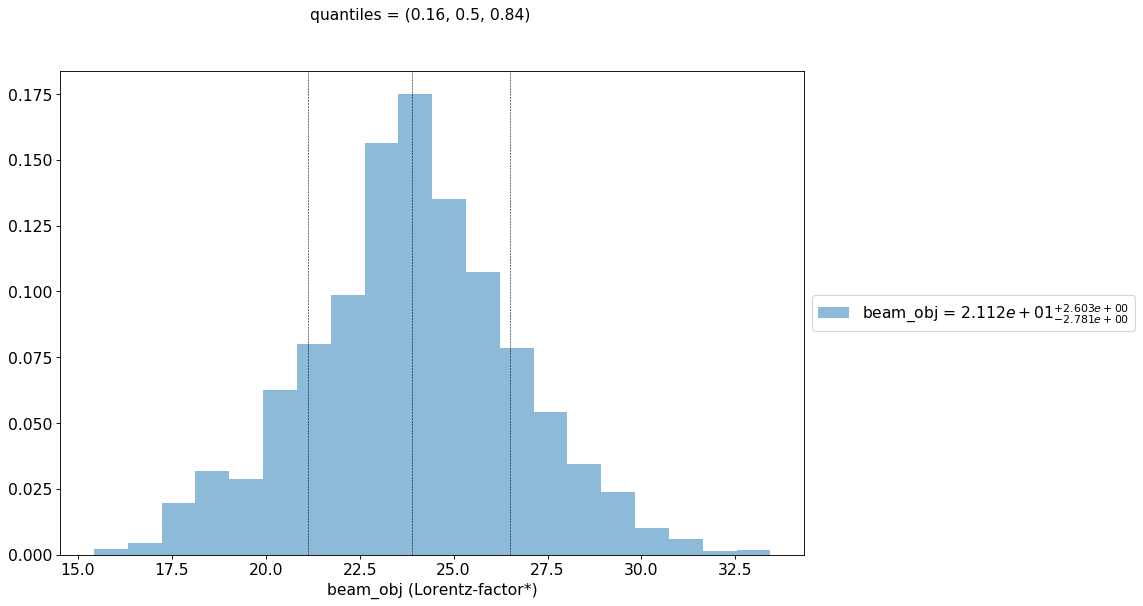

In [26]:
f=mcmc.plot_par('beam_obj')

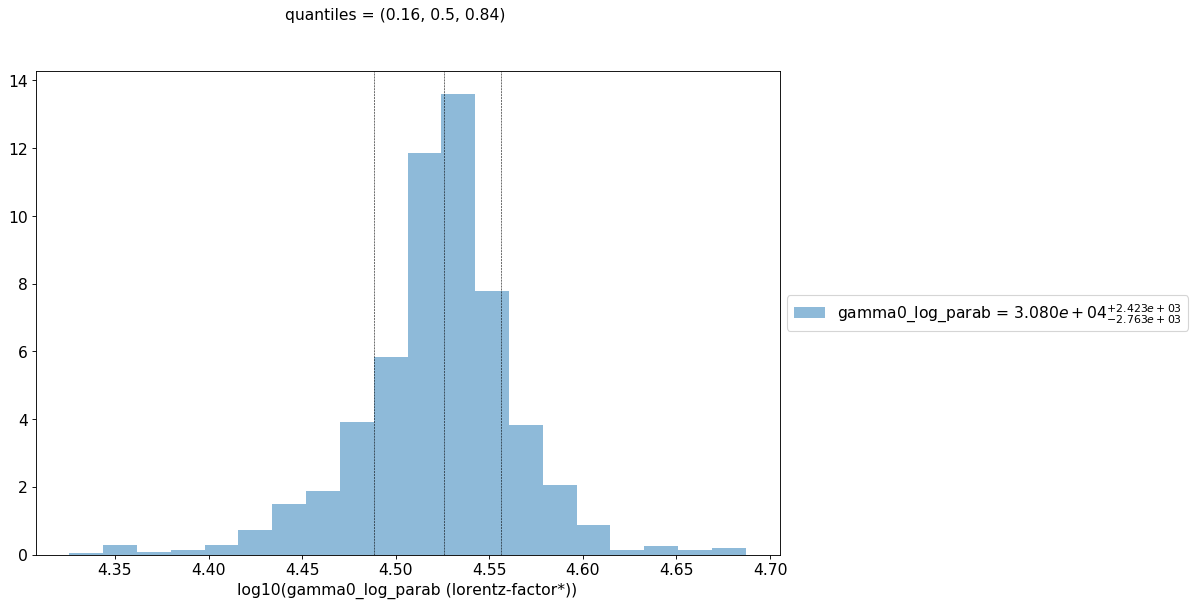

In [27]:
f=mcmc.plot_par('gamma0_log_parab',log_plot=True)

## Save and resue MCMC

In [28]:
mcmc.save('mcmc_sampler.pkl')

In [29]:
from jetset.mcmc import McmcSampler
from jetset.data_loader import ObsData
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs

sed_data=ObsData.load('Mrk_401.pkl')

ms=McmcSampler.load('mcmc_sampler.pkl')

In [30]:
ms.model.name

'Only-Synch-best-fit-minuit'

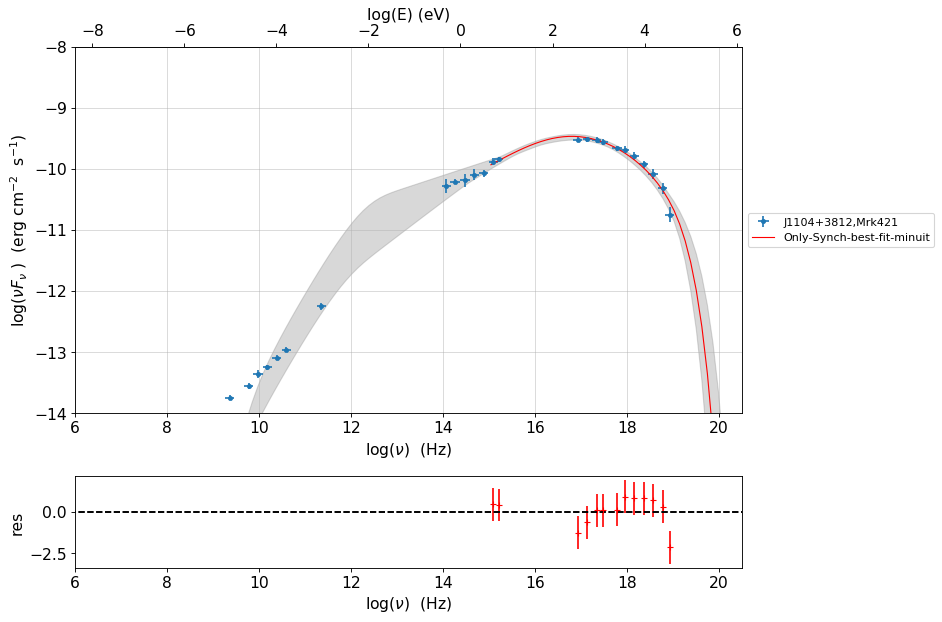

In [31]:
p=ms.plot_model(sed_data=sed_data,fit_range=[15., 20.],size=50)
p.rescale(y_min=-14,x_min=6,x_max=20.5)

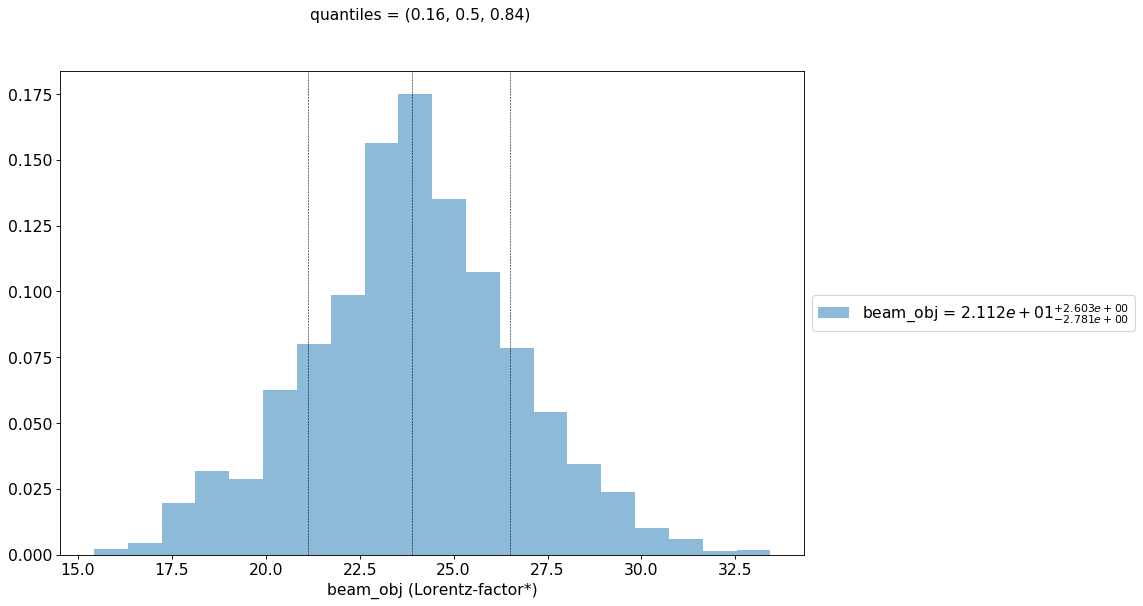

In [32]:
f=ms.plot_par('beam_obj',log_plot=False)


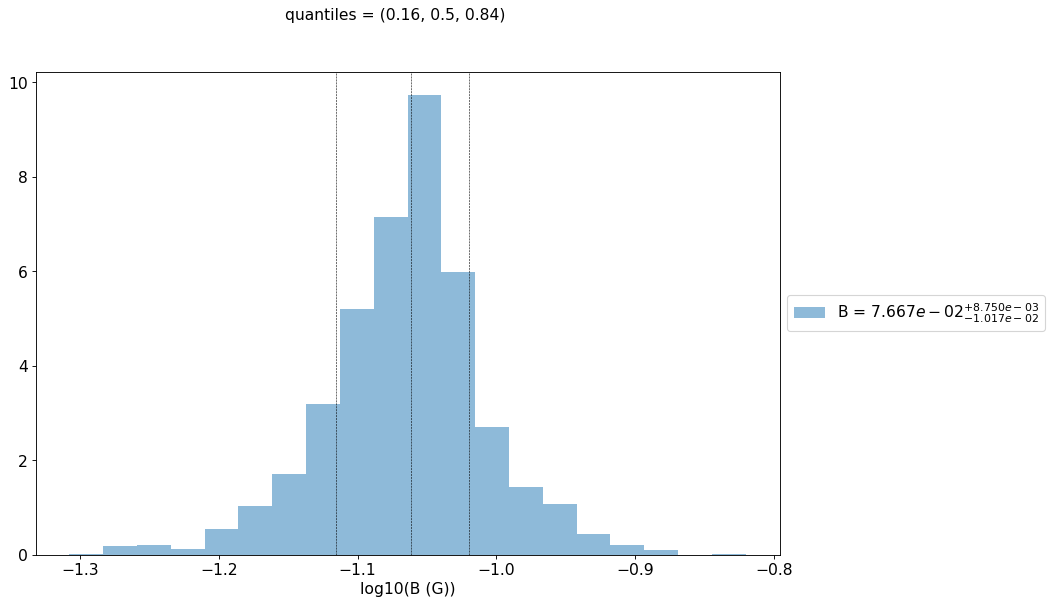

In [33]:
f=ms.plot_par('B',log_plot=True)


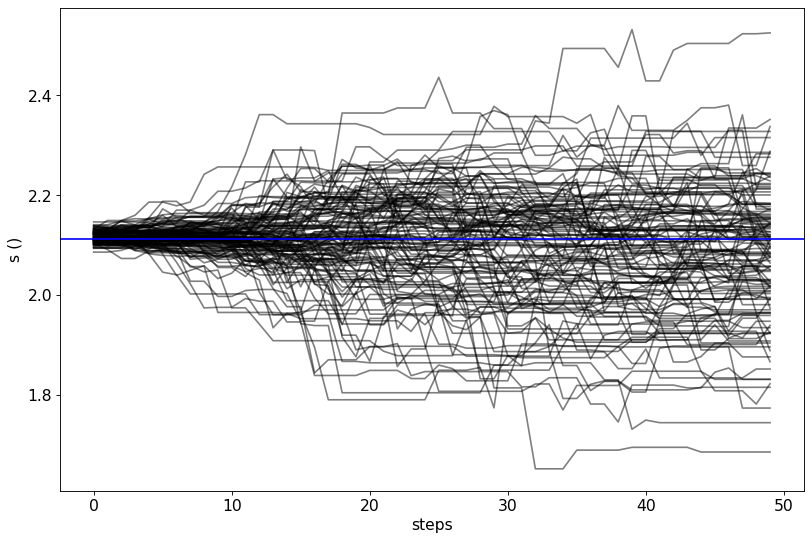

In [34]:
f=mcmc.plot_chain('s',log_plot=False)

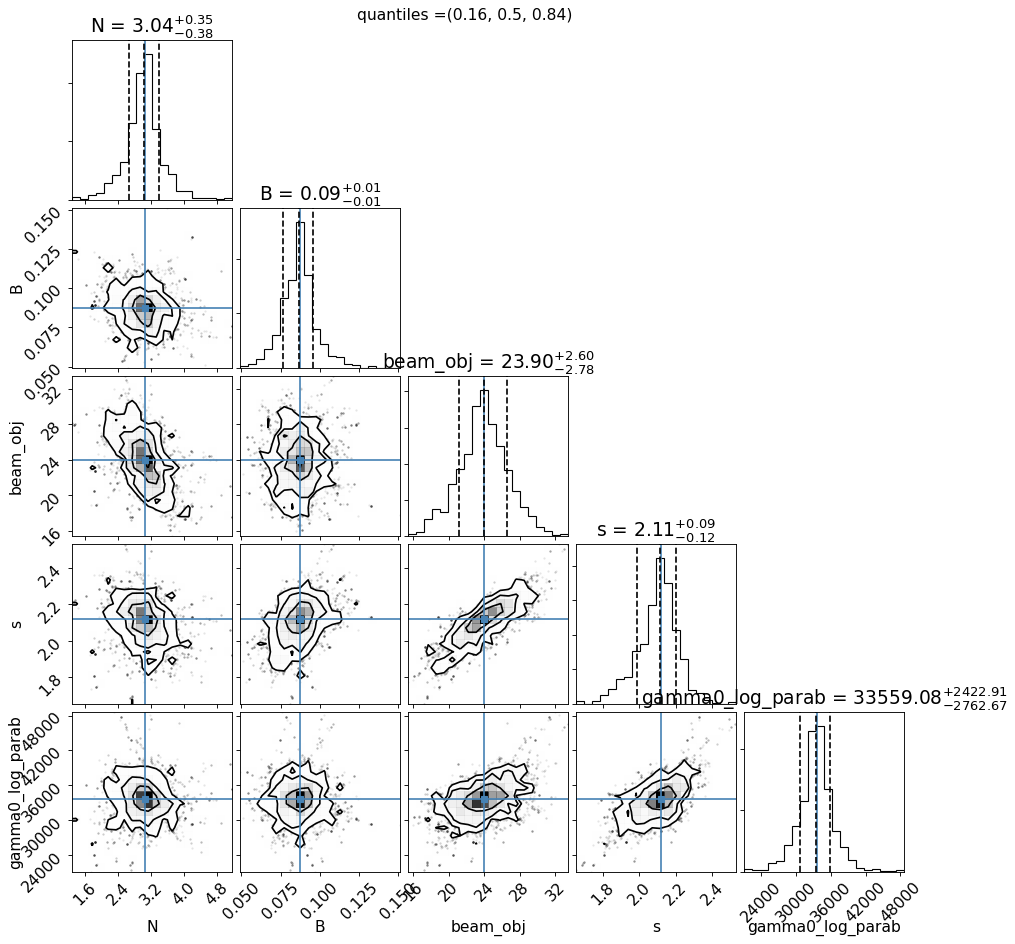

In [35]:
f=mcmc.corner_plot()